In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
npoints = 300000
ogmean = (6,8)
ogcov = ((1,0),(0,1))
points = np.random.multivariate_normal(ogmean, ogcov, npoints)
premean1 = np.mean(points[:,0])
premean2 = np.mean(points[:,1])
precov1 = np.cov(points[:,0])
precov2 = np.cov(points[:,1])

In [32]:
def nonlinear_func(point):
    return np.asarray((5 + 0.2*point[0]**2 + 0.2*point[1]**2, 3 + 0.2*point[0]**2 - 0.2*point[1]**2))
effdpoints = np.asarray([nonlinear_func(i) for i in points])

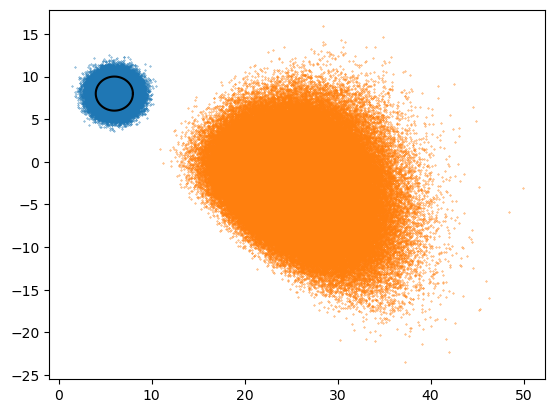

In [33]:
u=premean1    #x-position of the center
v=premean2    #y-position of the center
a=2*np.sqrt(precov1)     #radius on the x-axis
b=2*np.sqrt(precov2)   #radius on the y-axis

plt.scatter(points[:,0], points[:,1], s=0.1)
plt.scatter(effdpoints[:,0], effdpoints[:,1], s=0.1)
t = np.linspace(0, 2*np.pi, 100)
plt.plot( ogmean[0]+a*np.cos(t) , ogmean[1]+b*np.sin(t), color='black')

In [34]:
# we begin by forming the sigma points
num_dim = 2
alpha = 1.
beta = 2.
num_sigma_points = 2*num_dim + 1
kappa = 3 - num_dim
lamd = (alpha**2)*(num_dim + kappa) - num_dim

root_p = np.linalg.cholesky(ogcov)

sigma_points = np.zeros((num_sigma_points, 2))
sigma_points[0] = ogmean
sigma_points[1] = ogmean + np.sqrt(num_dim + lamd)*root_p[:,0]
sigma_points[2] = ogmean + np.sqrt(num_dim + lamd)*root_p[:,1]
sigma_points[3] = ogmean - np.sqrt(num_dim + lamd)*root_p[:,0]
sigma_points[4] = ogmean - np.sqrt(num_dim + lamd)*root_p[:,1]

In [35]:
sigma_effdpoints = np.asarray([nonlinear_func(i) for i in sigma_points])

In [36]:
# defining sigma point weightings

mean_weights = np.zeros(num_sigma_points)
cov_weights = np.zeros(num_sigma_points)

mean_weights[0] = lamd/(num_dim + lamd)
cov_weights[0] = lamd/(num_dim + lamd) + (1-alpha**2 + beta)
for i in range(1, num_sigma_points):
    mean_weights[i] = cov_weights[i] = 1/(2*(num_dim + lamd))

In [37]:
scented_mean = mean_weights.T @ sigma_effdpoints

scented_cov = np.sum(np.asarray([cov_weights[i] * np.outer((sigma_effdpoints[i,:] - scented_mean), (sigma_effdpoints[i,:] - scented_mean).T) for i in range(num_sigma_points)]), axis=0)

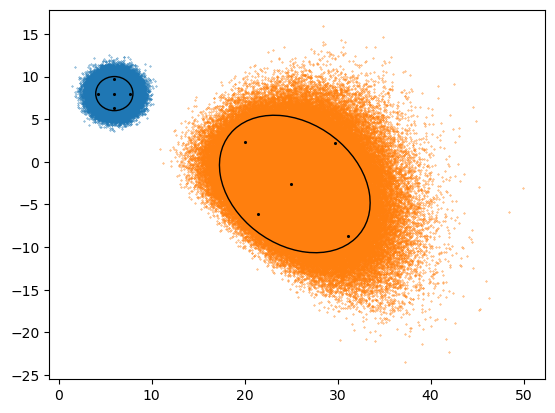

In [38]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

eigenvalues, eigenvectors = np.linalg.eigh(ogcov)
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Compute the angle of the ellipse (rotation of the largest eigenvector from the x-axis)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

# Width and height of the ellipse (2 * sqrt(eigenvalue) for 1 std-dev)
width, height = 4 * np.sqrt(eigenvalues)

ax.scatter(points[:,0], points[:,1], s=0.1)
ax.scatter(effdpoints[:,0], effdpoints[:,1], s=0.1)
ellipse = Ellipse(ogmean, width=width, height=height, angle=angle, edgecolor='black', facecolor='none')
ax.add_patch(ellipse)

eigenvalues, eigenvectors = np.linalg.eigh(scented_cov)
order = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Compute the angle of the ellipse (rotation of the largest eigenvector from the x-axis)
angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

# Width and height of the ellipse (2 * sqrt(eigenvalue) for 1 std-dev)
width, height = 4 * np.sqrt(eigenvalues)
ellipse = Ellipse(scented_mean, width=width, height=height, angle=angle, edgecolor='black', facecolor='none')
ax.add_patch(ellipse)
ax.scatter(sigma_points[:,0], sigma_points[:,1], color='black', s=1.5)
ax.scatter(sigma_effdpoints[:,0], sigma_effdpoints[:,1], color='black', s=1.5)
# ax.scatter(scented_mean[0], scented_mean[1])